In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
data = pd.read_excel(r"C:\Users\vishw\Downloads\Delhi .xlsx", header=2)
data.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [29]:
data.sort_values(by='date',inplace=True)
data.reset_index(drop=True,inplace=True)
data.head()

,date,pm25
0,2018-01-01 00:00:00,423
1,2018-01-01 01:00:00,414
2,2018-01-01 02:00:00,417
3,2018-01-01 03:00:00,466
4,2018-01-01 04:00:00,470


In [30]:
data['pm25'].replace(to_replace='-',value=np.nan, inplace=True)
data.isna().sum()

date     0
pm25    80
dtype: int64

In [31]:
data['pm25'].interpolate(method='linear', inplace =True)

<AxesSubplot:>

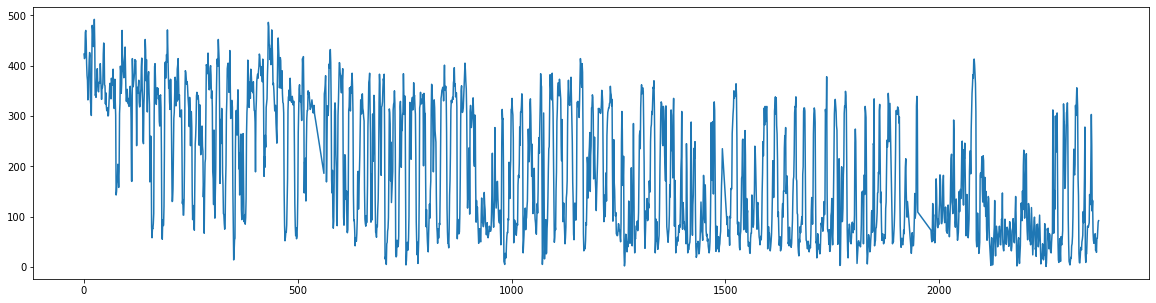

In [32]:
data['pm25'].plot(kind='line', figsize=(20,5))

In [33]:
data1 = data.set_index('date')
data1.head()

,pm25
date,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


In [8]:
# separate out a validation dataset
Train = data1[:2350]
Test = data1[2350:]
print("Train and Test =",len(Train), len(Test))

Train and Test = 2350 24


<ipython-input-9-c72c2f2be9e2>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(data1, model='additive', freq=24)


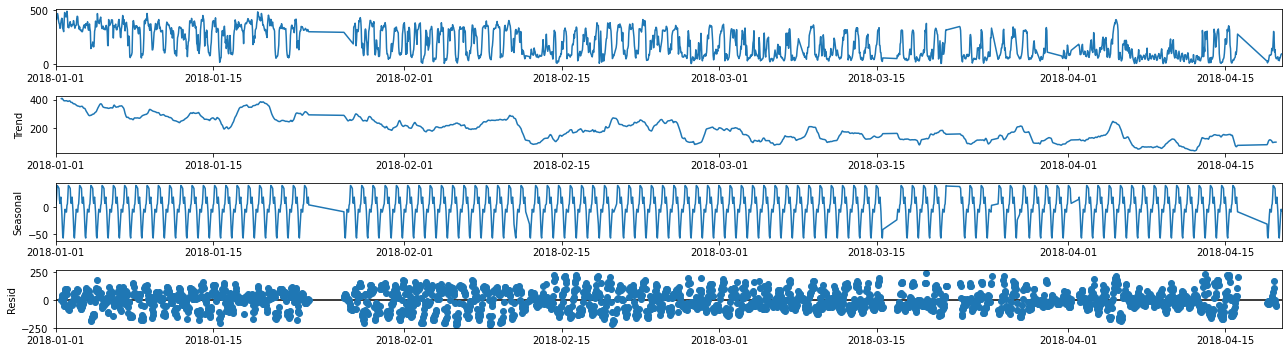

In [9]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18,5
decomposition = sm.tsa.seasonal_decompose(data1, model='additive', freq=24)
fig = decomposition.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result = adfuller(data1)

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(pm25):
    result=adfuller(pm25)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(data1)

ADF Test Statistic : -3.5592837476759986
p-value : 0.00658887893825456
#Lags Used : 27
Number of Observations Used : 2346
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [14]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
p=range(0,6)
d=range(0,2)
q=range(0,6)

In [15]:
pdq_combination = list(itertools.product(p,d,q))
len(pdq_combination)

72

In [16]:
rmse=[]
order1=[]

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
for pdq in pdq_combination:
    try:
        model=ARIMA(Train,order=pdq).fit()
        pred=model.predict(start=len(Train),end=(len(data1)-1))
        error = np.sqrt(mean_squared_error(Test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue
    

In [19]:
results = pd.DataFrame(index=order1, data=rmse, columns={'RMSE'})

In [20]:
results.sort_values(by='RMSE',inplace=True)
print(results)

                 RMSE
(5, 0, 4)   67.371708
(5, 0, 3)   67.394892
(4, 0, 4)   67.558463
(3, 0, 2)   68.203229
(4, 0, 5)   68.468510
...               ...
(5, 1, 4)  120.737619
(4, 1, 3)  120.760208
(4, 1, 5)  120.814580
(2, 1, 5)  121.324077
(5, 0, 2)  160.415878

[65 rows x 1 columns]


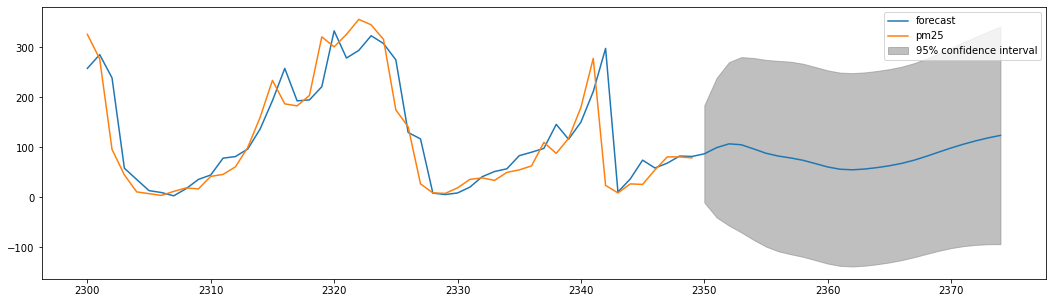

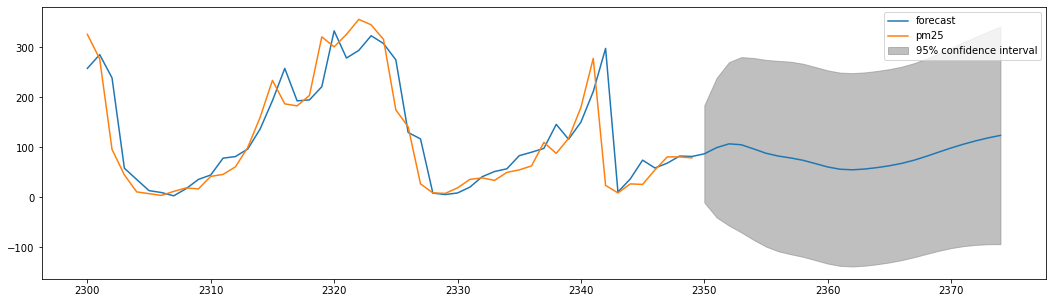

In [21]:
model1 = ARIMA(Train, order=(5,0,4))
model_fit = model1.fit(disp=0)
forecast=model_fit.forecast(steps=24)[0]
model_fit.plot_predict(2300, 2374)

In [22]:
start = len(Train)
end = len(Train)+len(Test)-1
pred=model_fit.predict(start=start, end=end, typ='levels')
print(pred)

2350     87.120845
2351     99.479241
2352    107.076342
2353    105.251369
2354     96.940323
2355     88.279412
2356     82.640848
2357     78.888848
2358     74.207507
2359     67.629220
2360     60.852014
2361     56.345025
2362     55.195217
2363     56.699558
2364     59.575777
2365     63.247069
2366     68.030173
2367     74.380434
2368     82.159457
2369     90.601873
2370     98.837794
2371    106.366102
2372    113.086321
2373    119.002545
dtype: float64


<AxesSubplot:xlabel='date'>

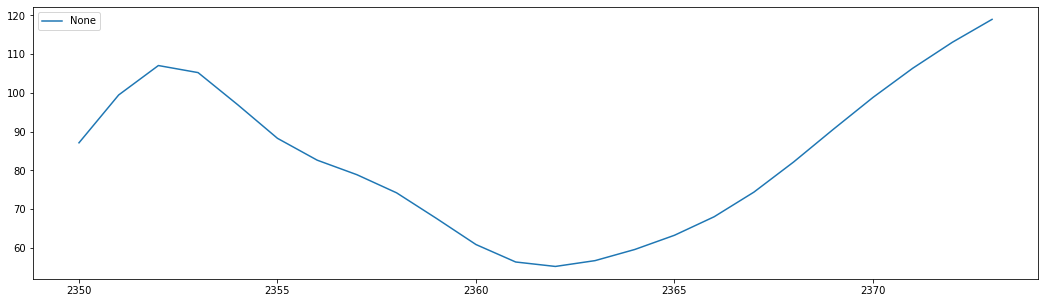

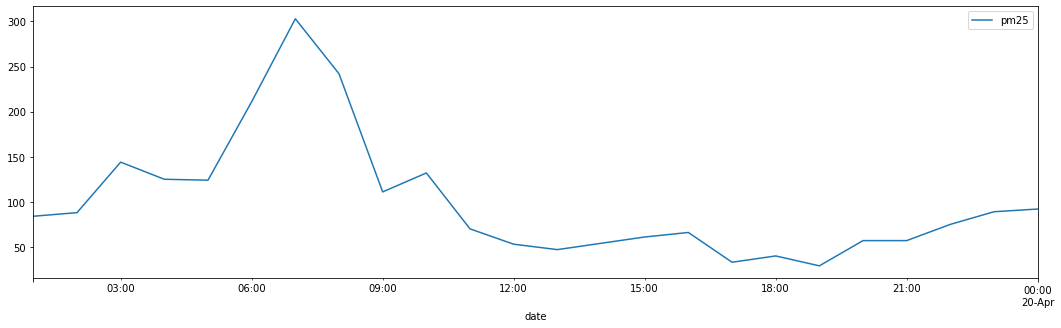

In [23]:
pred.plot(legend=True)
Test.plot(legend=True)

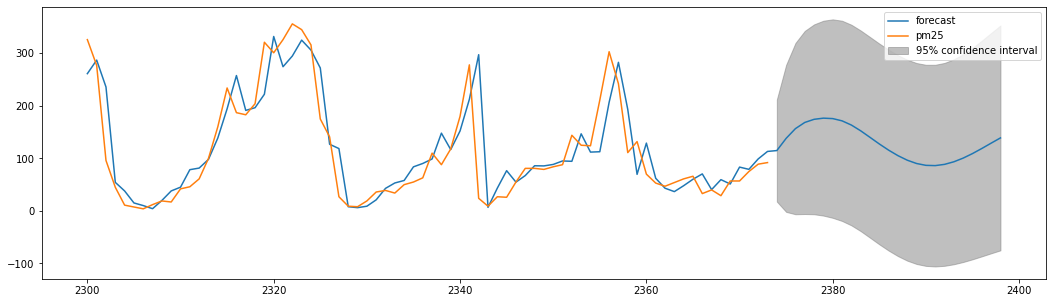

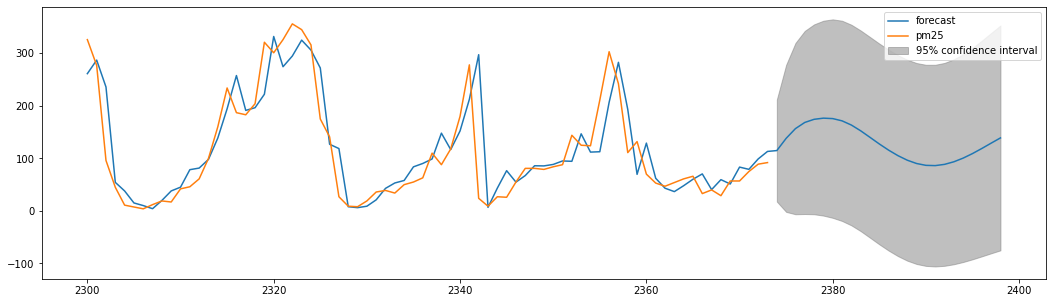

In [24]:
model = ARIMA(data1, order=(5,0,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=24)[0]
model_fit.plot_predict(2300, 2399)

In [25]:
pd.DataFrame(forecast)

,0
0,114.876443
1,138.132452
2,156.694287
3,168.388731
4,174.358231
5,176.561721
6,175.727852
7,171.440209
8,163.445022
9,152.483942


<AxesSubplot:>

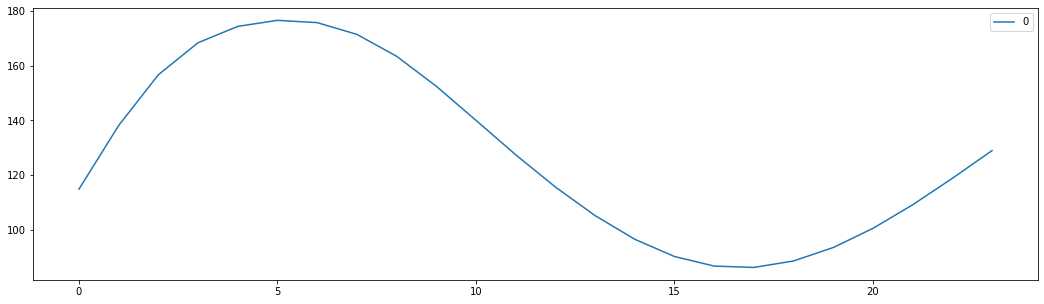

In [26]:
pd.DataFrame(forecast).plot(legend=True)